#Analyzing the prices of AirBnb data in New York Ciy - Group 41
Group members:
- Ataberk Yılmaz 26829
- Kaan Söylemez 26950

##Introduction
There are many Airbnb’s in NYC with different prices. In this project we will be analyzing what kind of correlations with these prices exist.

###Problem Definition
NYC has different options when it comes to AirBnb pricing. But when we look at the prices, we observe that there is a huge gap between the maximum and minimum price an individual would pay.

Hypothesis: We believe that the following factors have a correlation with AirBnb prices: 
1. Number of reviews: Number of reviews is an indicator for demand, so we assume that there will be a correlation. 
2. Room Types: Whether the place is a private room, shared room or the entire house will definitely have a correlation since it is an important aspect.
3. Neighbourhood groups: There are 5 neighbourhood groups in NYC. They all offer different kind of opportunities and have different standarts so there must be a correlation between them. We will also look into why there is a correlation by analysing the public transportation opportunities of the neighbourhood groups. 

We will utilize several datasets to find out if these correlations really exist.



###Utilized Datasets
- New York City Airbnb Open Data:
" https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data "
- Subway Entrances, Map of NYC Subway Entrances:
" https://data.cityofnewyork.us/Transportation/Subway-Entrances/drex-xx56 "
- NYC Transit Subway Entrance and Exit Data:
" https://data.ny.gov/Transportation/NYC-Transit-Subway-Entrance-And-Exit-Data/i9wp-a4ja "



In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


path = "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
import pandas as pd  # an alias for pandas
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from scipy import stats
from os.path import join

%matplotlib inline

# Observation of our main data

In [ ]:
filename = "AB_NYC_2019.csv"
df = pd.read_csv(join(path, filename))
filename2 = "NYC_Transit_Subway_Entrance_And_Exit_Data.csv"
df_1 = pd.read_csv(join(path, filename2))

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df_1.head(100)

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,NONE,NaN,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BMT,Brighton,Kings Highway,40.608670,-73.957734,B,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Door,YES,NaN,YES,NONE,NaN,False,NaN,True,15th St,Kings Hwy,NE,40.609062,-73.957808,"(40.60867, -73.957734)","(40.609062, -73.957808)"
96,BMT,Brighton,Kings Highway,40.608670,-73.957734,B,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Door,YES,NaN,YES,FULL,NaN,False,NaN,True,15th St,Kings Hwy,SE,40.608835,-73.957769,"(40.60867, -73.957734)","(40.608835, -73.957769)"
97,BMT,Brighton,Kings Highway,40.608670,-73.957734,B,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Door,YES,NaN,YES,PART,NaN,False,NaN,True,NaN,NaN,W,40.608319,-73.957352,"(40.60867, -73.957734)","(40.608319, -73.957352)"
98,BMT,Brighton,Neck Rd,40.595246,-73.955161,B,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Door,YES,NaN,YES,FULL,NaN,False,NaN,True,15th St,Gravesend Neck Rd,NE,40.595020,-73.955120,"(40.595246, -73.955161)","(40.59502, -73.95512)"


# Pre-processing the Data

## Pre-processing NYC AirBnb data

We used "set" function to process our data and determine the name of the neighbourhood groups we have in our data, easily.

In [ ]:
neighbourhood_group = tuple(set(df["neighbourhood_group"]))
print(neighbourhood_group)

('Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx')


We use "set" function again but this time we are processing the data to determine our room types

In [ ]:
room_type = tuple(set(df["room_type"]))
print(room_type)

('Private room', 'Shared room', 'Entire home/apt')


We are dividing our data based on the regions we have, so that we can use them later when we need them seperated.

In [ ]:
brooklyn_set = df[df["neighbourhood_group"] == "Brooklyn"]
manhattan_set = df[df["neighbourhood_group"] == "Manhattan"]
queens_set = df[df["neighbourhood_group"] == "Queens"]
staten_island_set = df[df["neighbourhood_group"] == "Staten Island"]
bronx_set = df[df["neighbourhood_group"] == "Bronx"]

Also we are dividing our data based on the room types of the house so that we can use it whenever needed

In [ ]:
entire_home_set = df[df["room_type"] == "Entire home/apt"]
shared_room_set = df[df["room_type"] == "Shared room"]
private_room_set = df[df["room_type"] == "Private room"]

### Average price in neighbourhood groups

---



In [ ]:
brooklyn_price = brooklyn_set["price"]
brooklyn_price_avg = (format(brooklyn_price.sum()/len(brooklyn_price),".2f") )

manhattan_price = manhattan_set["price"]
manhattan_price_avg = (format(manhattan_price.sum()/len(manhattan_price),".2f"))

queens_price = queens_set["price"]
queens_price_avg = (format(queens_price.sum()/len(queens_price),".2f"))

staten_island_price = staten_island_set["price"]
staten_island_price_avg = (format(staten_island_price.sum()/len(staten_island_price),".2f"))

bronx_price = bronx_set["price"]
bronx_price_avg = (format(bronx_price.sum()/len(bronx_price),".2f"))

print("Average rental prices by $ (per day) in: ")
print("Brooklyn:", brooklyn_price_avg )
print("Manhattan:", manhattan_price_avg)
print("Queens:", queens_price_avg)
print("Staten Island:", staten_island_price_avg)
print("Bronx:", bronx_price_avg)

Average rental prices by $ (per day) in: 
Brooklyn: 124.38
Manhattan: 196.88
Queens: 99.52
Staten Island: 114.81
Bronx: 87.50


### Average price in room types

In [ ]:
entire_home_price = entire_home_set["price"]
entire_home_price_avg = format(entire_home_price.sum()/len(entire_home_price),".2f")

shared_room_price = shared_room_set["price"]
shared_room_price_avg = format(shared_room_price.sum()/len(shared_room_price),".2f")

private_room_price = private_room_set["price"]
private_room_price_avg = format(private_room_price.sum()/len(private_room_price),".2f")

print("Average rental prices by $ (per day) when: ")
print("Entire home/apt:", entire_home_price_avg)
print("Shared room:", shared_room_price_avg)
print("Private room:", private_room_price_avg)

Average rental prices by $ (per day) when: 
Entire home/apt: 211.79
Shared room: 70.13
Private room: 89.78


###Number of room types in neighbourhood groups

In [ ]:
m_df = manhattan_set[manhattan_set["room_type"] == "Entire home/apt"]
man_entire = len(m_df)
b_df = brooklyn_set[brooklyn_set["room_type"] == "Entire home/apt"]
brk_entire = len(b_df)
q_df = queens_set[queens_set["room_type"] == "Entire home/apt"]
queens_entire = len(q_df)
si_df = staten_island_set[staten_island_set["room_type"] == "Entire home/apt"]
si_entire = len(si_df)
bx_df = bronx_set[bronx_set["room_type"] == "Entire home/apt"]
bx_entire = len(bx_df)

m1_df = manhattan_set[manhattan_set["room_type"] == "Private room"]
man_priv = len(m1_df)
b1_df = brooklyn_set[brooklyn_set["room_type"] == "Private room"]
brk_priv = len(b1_df)
q1_df = queens_set[queens_set["room_type"] == "Private room"]
queens_priv = len(q1_df)
si1_df = staten_island_set[staten_island_set["room_type"] == "Private room"]
si_priv = len(si1_df)
bx1_df = bronx_set[bronx_set["room_type"] == "Private room"]
bx_priv = len(bx1_df)

m2_df = manhattan_set[manhattan_set["room_type"] == "Shared room"]
man_share = len(m2_df)
b2_df = brooklyn_set[brooklyn_set["room_type"] == "Shared room"]
brk_share = len(b2_df)
q2_df = queens_set[queens_set["room_type"] == "Shared room"]
queens_share = len(q2_df)
si2_df = staten_island_set[staten_island_set["room_type"] == "Shared room"]
si_share = len(si2_df)
bx2_df = bronx_set[bronx_set["room_type"] == "Shared room"]
bx_share = len(bx2_df)

## Pre-processing NYC Subway data

We are processing our Subway data to determine the names of the stations, we will use the coordinates of these stations to have some distance values between AirBnb's and the subway.

In [ ]:
station_name = tuple(set(df_1["Station Name"]))
print(station_name)

('Kingsbridge Rd', 'Times Square', '137th St-City College', '116th St', 'Bleecker St', 'Forest Hills-71st Av', 'Neptune Av-Van Siclen', 'Bay Parkway', 'Wakefield-241st St', 'Rockaway Blvd', 'Bowery', '225th St', 'City Hall', 'Cypress Hills', '181st St', 'Fordham Rd', 'Bushwick Av', 'Intervale Av', '53rd St', 'Spring St', 'DeKalb Av', 'Freeman St', 'Sutter Av', 'Queens Plaza', 'Av X', '135th St', '90th St Elmhurst', '51st St', 'East Broadway', '50th St', 'Whitehall St', '176th St', 'Bronx Park East', 'Church Av', 'East 180th St', 'Allerton Av', '63rd Drive-Rego Park', 'Buhre Av', '75th Av', '18th St', 'Flushing-Main St', '66th St-Lincoln Center', '155th St', 'Pacific St', '4th Av', 'High St', 'Alabama Av', 'Far Rockaway-Mott Av', 'East 105th St', 'Av H', '207th St', 'Beach 25th St', '82nd St-Jackson Heights', 'Ralph Av', 'Beach 67th St', 'New Lots Av', 'Lowery St-40th St', 'Ocean Parkway', '170th St', '111th St', 'Kosciusko St', 'Christopher St', 'Mets - Willets Point', '121st St', 'Hal

In [ ]:
df_1 = df_1.drop_duplicates("Station Name", keep='first', inplace=False)
df_1.head(50)

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,NONE,NaN,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
5,BMT,4 Avenue,45th St,40.648939,-74.010006,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,45th St,NE,40.649389,-74.009333,"(40.648939, -74.010006)","(40.649389, -74.009333)"
9,BMT,4 Avenue,53rd St,40.645069,-74.014034,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,53rd St,SW,40.644756,-74.014586,"(40.645069, -74.014034)","(40.644756, -74.014586)"
14,BMT,4 Avenue,59th St,40.641362,-74.017881,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,59th St,NW,40.641606,-74.017897,"(40.641362, -74.017881)","(40.641606, -74.017897)"
20,BMT,4 Avenue,77th St,40.629742,-74.025510,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,77th St,NW,40.629550,-74.025731,"(40.629742, -74.02551)","(40.62955, -74.025731)"
23,BMT,4 Avenue,86th St,40.622687,-74.028398,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,86th St,SE,40.622583,-74.028315,"(40.622687, -74.028398)","(40.622583, -74.028315)"
26,BMT,4 Avenue,95th St,40.616622,-74.030876,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,95th St,SW,40.616021,-74.031383,"(40.616622, -74.030876)","(40.616021, -74.031383)"
31,BMT,4 Avenue,9th St,40.670847,-73.988302,F,G,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,9th St,NE,40.670387,-73.988480,"(40.670847, -73.988302)","(40.670387, -73.98848)"
33,BMT,4 Avenue,Atlantic Av-Barclays Ctr,40.683666,-73.978810,B,Q,D,N,R,2,3,4.0,5.0,NaN,NaN,Elevator,YES,NaN,YES,FULL,NaN,True,NaN,True,4th Ave,Pacific St,NE,40.683805,-73.978487,"(40.683666, -73.97881)","(40.683805, -73.978487)"


In [ ]:
subway_latitude = tuple(df_1["Station Latitude"])
subway_longitude = tuple(df_1["Station Longitude"])

# Data Exploration



## Correlation between number of reviews and price

In [ ]:
df["number_of_reviews"].mean()

23.274465691788528

In [ ]:
def num_of_reviews_simplified(num):
  r = int(num)
  if r < 11.637232845894264:
    a = 1
    return a
  elif 11.637232845894264 < r < 23.274465691788528:
    a = 2
    return a
  elif 23.274465691788528 < r < 34.911698537682796:
    a = 3
    return a
  else:
    a = 4
    return a       

df["number_of_reviews_by_num"] = df["number_of_reviews"].apply(num_of_reviews_simplified)
entire_home_set["number_of_reviews_by_num"] = entire_home_set["number_of_reviews"].apply(num_of_reviews_simplified)
shared_room_set["number_of_reviews_by_num"] = shared_room_set["number_of_reviews"].apply(num_of_reviews_simplified)
private_room_set["number_of_reviews_by_num"] = private_room_set["number_of_reviews"].apply(num_of_reviews_simplified)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

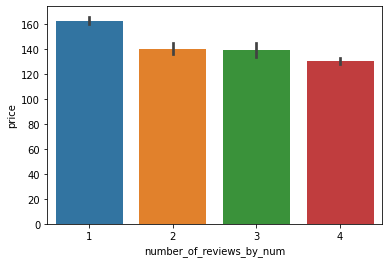

In [ ]:
sns.barplot(x= "number_of_reviews_by_num", y= "price", data = df)

In [ ]:
stats.pointbiserialr(df["price"], df["number_of_reviews_by_num"])

PointbiserialrResult(correlation=-0.05512903892665535, pvalue=3.1382883813392194e-34)

Text(0.5, 1.0, 'Private Room')

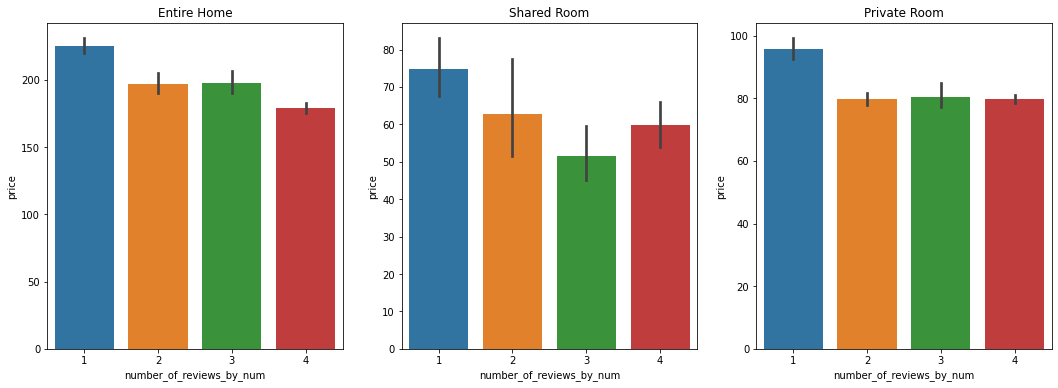

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x= "number_of_reviews_by_num", y= "price", data = entire_home_set, ax = ax1)
ax1.set_title("Entire Home")
sns.barplot(x= "number_of_reviews_by_num", y= "price", data = shared_room_set, ax = ax2)
ax2.set_title("Shared Room")
sns.barplot(x= "number_of_reviews_by_num", y= "price", data = private_room_set, ax = ax3)
ax3.set_title("Private Room")

In [ ]:
a = stats.pointbiserialr(entire_home_set["price"], entire_home_set["number_of_reviews_by_num"])
b = stats.pointbiserialr(shared_room_set["price"], shared_room_set["number_of_reviews_by_num"])
c = stats.pointbiserialr(private_room_set["price"], private_room_set["number_of_reviews_by_num"])
print(a)
print(b)
print(c)

PointbiserialrResult(correlation=-0.0650417968560021, pvalue=3.113574244190179e-25)
PointbiserialrResult(correlation=-0.06504096136016113, pvalue=0.02674820309311629)
PointbiserialrResult(correlation=-0.042495719601080714, pvalue=2.122896529798404e-10)


###Initial findings:

There seems to be a negative correlation with a small value. This indicates that the price of the AirBnb's drop as the number of reviews they receive increases. One reason for this can be that AirBnb's with lower prices might be attracting more customers, which results in more reviews. However this could also be a result of data manipulation because since we are comparing by total number of reviews an AirBnb which has been on the system longer in comparison may have more reviews even though it doesn't attract many customers. We need to have more understanding on this correlation so we will continue by analysing the number of reviews per month data, which should give us a more accurate result.

## Correlation between number of reviews per month and price

In [ ]:
a = df["reviews_per_month"].mean()/2
b = df["reviews_per_month"].mean()
c = df["reviews_per_month"].mean()*3/2
print (a , b , c)

0.6866107149293442 1.3732214298586884 2.059832144788033


In [ ]:
def reviews_per_month_simplified(num):
  r = float(num)
  if r < 0.6866107149293442:
    a = 1
    return a
  elif 0.6866107149293442 < r < 1.3732214298586884:
    a = 2
    return a
  elif 1.3732214298586884 < r < 2.059832144788033:
    a = 3
    return a
  else:
    a = 4
    return a       

df["reviews_per_month_by_num"] = df["reviews_per_month"].apply(reviews_per_month_simplified)
entire_home_set["reviews_per_month_by_num"] = entire_home_set["reviews_per_month"].apply(reviews_per_month_simplified)
shared_room_set["reviews_per_month_by_num"] = shared_room_set["reviews_per_month"].apply(reviews_per_month_simplified)
private_room_set["reviews_per_month_by_num"] = private_room_set["reviews_per_month"].apply(reviews_per_month_simplified)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

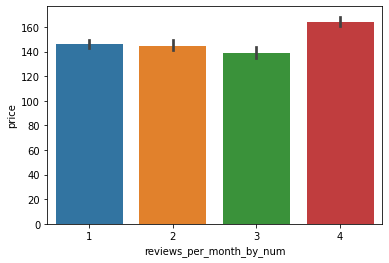

In [ ]:
sns.barplot(x= "reviews_per_month_by_num", y= "price", data = df)

In [ ]:
stats.pointbiserialr(df["price"], df["reviews_per_month_by_num"])

PointbiserialrResult(correlation=0.03320792069619965, pvalue=2.0599880564826523e-13)

Text(0.5, 1.0, 'Private Room')

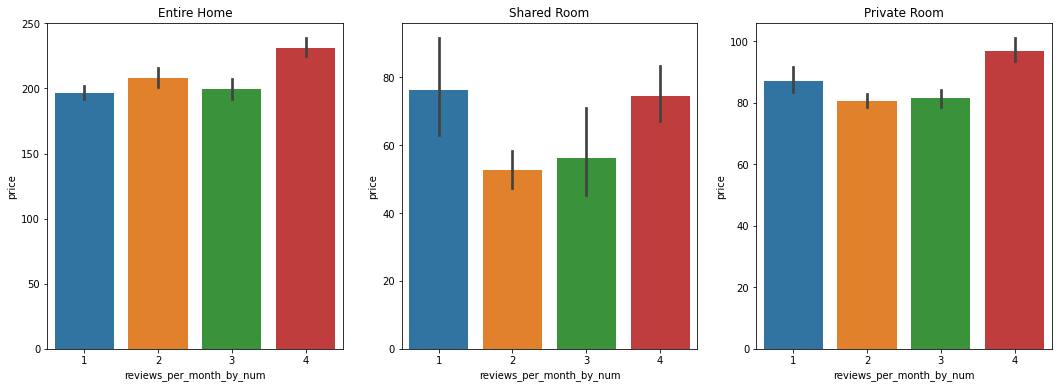

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x= "reviews_per_month_by_num", y= "price", data = entire_home_set, ax = ax1)
ax1.set_title("Entire Home")
sns.barplot(x= "reviews_per_month_by_num", y= "price", data = shared_room_set, ax = ax2)
ax2.set_title("Shared Room")
sns.barplot(x= "reviews_per_month_by_num", y= "price", data = private_room_set, ax = ax3)
ax3.set_title("Private Room")

In [ ]:
a = stats.pointbiserialr(entire_home_set["price"], entire_home_set["reviews_per_month_by_num"])
b = stats.pointbiserialr(shared_room_set["price"], shared_room_set["reviews_per_month_by_num"])
c = stats.pointbiserialr(private_room_set["price"], private_room_set["reviews_per_month_by_num"])
print(a)
print(b)
print(c)

PointbiserialrResult(correlation=0.053163783924045624, pvalue=2.2520578712090812e-17)
PointbiserialrResult(correlation=0.005924926914169973, pvalue=0.8402451223762852)
PointbiserialrResult(correlation=0.028077524768856634, pvalue=2.7178487625954257e-05)


### Final Result:

The analysis of reviews per month data gave us a positive correlation. This proves that there has been a data manipulation in the analysis of total reviews. As for the question of a correlation, the correlation coefficients are little and the graphs are unstable, so it is quite possible that a correlation doesn't exist. However, while the columns 1, 2 and 3 are unstable, there is a visible increase in the 4th columns, so our final conclusion is that the number of reviews received in columns 1, 2 or 3 doesn't mean a demand high enough to cause a raise that will have an impact on this data, but reviews received in the 4th columns do, and that is the only correlation.

## Correlation between room types and price

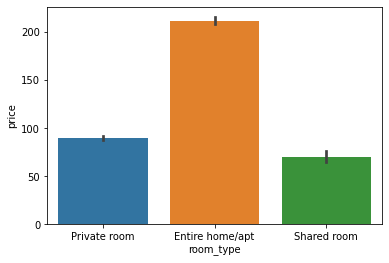

In [ ]:
sns.barplot(x= "room_type", y= "price", data = df)

### Result:

There is a visible and predictable correlation in this one. The entire homes are priced highest and even though they are close we can easiliy observe that private rooms cost more than shared rooms.

## Correlation between neighbourhoods and price

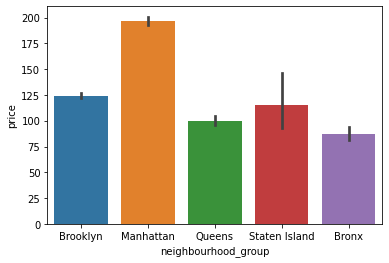

In [ ]:
sns.barplot(x= "neighbourhood_group", y= "price", data = df)

###Result:

The ranking is obvious on the graph, so there is a correlaition as Manhattan > Brooklyn > Staten Island > Queens > Bronx. However the reason for this ranking is unknow, in order to find out the reason we have to analyse the neighbourhoods.

###The room type distribution between neighbourhoods:

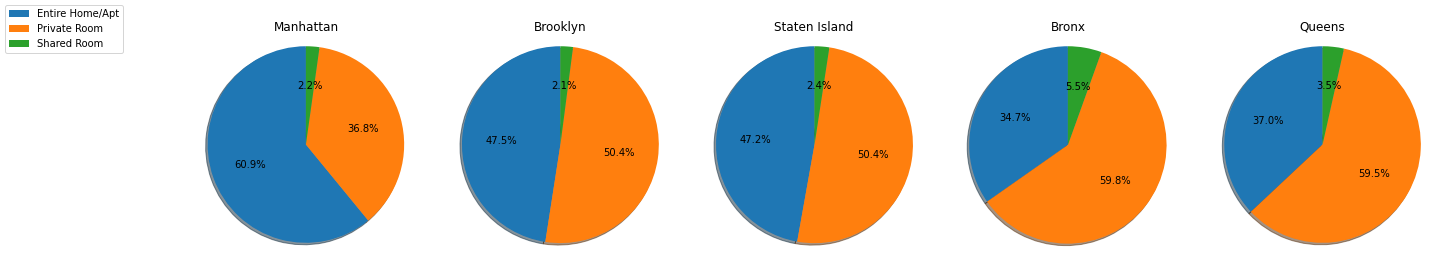

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Entire Home/Apt', 'Private Room', 'Shared Room'
sizes = [man_entire, man_priv, man_share]
sizes1 = [brk_entire, brk_priv, brk_share]
sizes2 = [si_entire, si_priv, si_share]
sizes3 = [bx_entire, bx_priv, bx_share]
sizes4 = [queens_entire, queens_priv, queens_share]
#explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(22,4))
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Manhattan", loc = "center")

ax2.pie(sizes1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title("Brooklyn", loc = "center")

ax3.pie(sizes2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')
ax3.set_title("Staten Island", loc = "center")

ax4.pie(sizes3, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.axis('equal')
ax4.set_title("Bronx", loc = "center")

ax5.pie(sizes4, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax5.axis('equal')
ax5.set_title("Queens", loc = "center")

fig1.legend(labels, loc='upper left', frameon=True)

plt.show()

### Result:

Our initial assesment of the neighbourhood groups prices was, Manhattan > Brooklyn > Staten Island > Queens > Bronx, if we look at the percentages of entire home/apartments in the neighbourhood groups, we observe that the same ranking applies. Since we know that entire home/apartments have the highest prices among the room types, we can conclude that one of the reasons behind the price ranking of the neighbourhood groups is room type distribution.

##The comparison of public transportation (subways will be used for this analysis) between neighbourhoods:

###Visualization of NYC Subway Data
First to have a better understanding of our subway data, we are visualizing the locations with various plots and maps.

In [ ]:
nycmap = folium.Map(location = [subway_latitude[0],subway_longitude[0]])
x = float(subway_latitude[0])
y = float(subway_longitude[0])
for i in range(len(subway_latitude)):
  x = float(subway_latitude[i])
  y = float(subway_longitude[i])
  folium.Marker([x,y]).add_to(nycmap)
nycmap

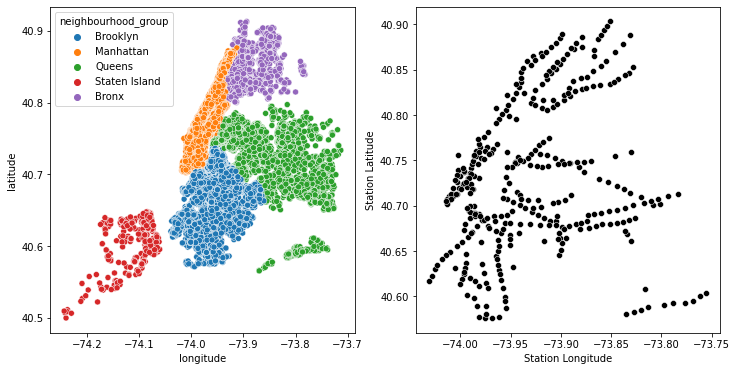

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x="longitude", y="latitude", data=df, hue="neighbourhood_group", ax=ax1)
sns.scatterplot(x= "Station Longitude", y= "Station Latitude", data = df_1, ax=ax2, color = "black")


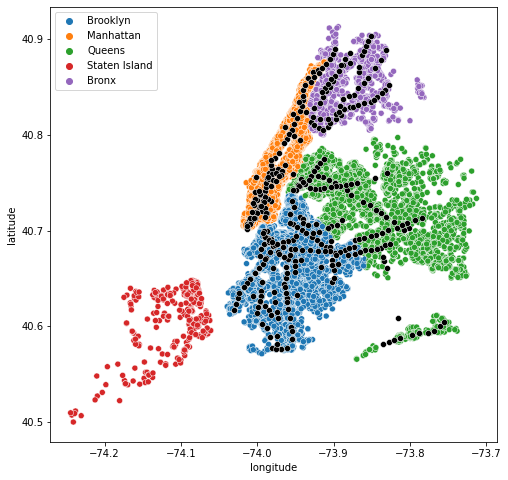

In [ ]:
positions = ["Brooklyn", "Manhattan", "Bronx", "Staten Island", "Queens"]
df_pos = df[df["neighbourhood_group"].isin(positions)]  # filter the original df

plt.figure(figsize=(8, 8))
sns.scatterplot(x="longitude", y="latitude", data=df_pos, hue="neighbourhood_group")  # grouping variable with hue
sns.scatterplot(x= "Station Longitude", y= "Station Latitude", data = df_1, color = "black")

By our maps we can observe that there are many subway entrances in NYC but 

###Distance calculating to nearest subway
We have a hypothesis which indicates that subway entrances has an affect on AirBnb pricing. To study this hypothesis with coordinates given in our both NYC AirBnb and NYC Subway datas, we are calculating the distances between houses and subway entrances and using the closest ones.

- We are adapting our datas "neighbourhood_group" and "room_type" columns to make them available for our machine learning method.

#Machine Learning
In the Machine Learning part of the project, we will use machine learning methods on our AirBnb data which also has "Distance to nearest subway" variables in each row. 

In [ ]:
def latitudeCal(num) :
  latList = []
  for i in subway_latitude:
    x = num - i
    if x < 0:
      x = x * -1
    latList.append(x)
  return min(latList)

def longitudeCal(num) :
  latList = []
  for i in subway_longitude:
    x = num - i
    if x < 0:
      x = x * -1
    latList.append(x)
  return min(latList)

df["distance_to_subway_by_latitude"] = df["latitude"].apply(latitudeCal)
df["distance_to_subway_by_longitude"] = df["longitude"].apply(longitudeCal)
df["distance_to_nearest_subway_parameter"] = (((df["distance_to_subway_by_latitude"]**2) + (df["distance_to_subway_by_longitude"]**2))** (1/2)) * 100

df["distance_to_nearest_subway_parameter"] = df["distance_to_nearest_subway_parameter"].map('{:,.2f}'.format)

df = df.drop(["distance_to_subway_by_latitude","distance_to_subway_by_longitude"], axis = 1)

In [ ]:
df['neighbourhood_group'] = df['neighbourhood_group'].map({"Manhattan": 0, "Brooklyn": 1, "Staten Island": 2, "Bronx": 3, "Queens": 4})
df['room_type'] = df['room_type'].map({'Entire home/apt': 0 , 'Private room': 1 , 'Shared room': 2})

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_by_num,reviews_per_month_by_num,distance_to_nearest_subway_parameter
0,2539,Clean & quiet apt home by the park,2787,John,1,Kensington,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365,1,1,0.12
1,2595,Skylit Midtown Castle,2845,Jennifer,0,Midtown,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355,4,1,0.06
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,0,Harlem,40.80902,-73.94190,1,150,3,0,NaN,NaN,1,365,1,4,0.04
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,Clinton Hill,40.68514,-73.95976,0,89,1,270,2019-07-05,4.64,1,194,4,4,0.07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,0,East Harlem,40.79851,-73.94399,0,80,10,9,2018-11-19,0.10,1,0,1,1,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,1,Bedford-Stuyvesant,40.67853,-73.94995,1,70,2,0,NaN,NaN,2,9,1,4,0.03
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,1,Bushwick,40.70184,-73.93317,1,40,4,0,NaN,NaN,2,36,1,4,0.02
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,0,Harlem,40.81475,-73.94867,0,115,10,0,NaN,NaN,1,27,1,4,0.14
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,0,Hell's Kitchen,40.75751,-73.99112,2,55,1,0,NaN,NaN,6,2,1,4,0.01


We are determining how to split our data and what to make estimations about.

In [ ]:
X = df[{'room_type', 'distance_to_nearest_subway_parameter','price'}]
y = df['neighbourhood_group']
print(X)
print(y)

       room_type distance_to_nearest_subway_parameter  price
0              1                                 0.12    149
1              0                                 0.06    225
2              1                                 0.04    150
3              0                                 0.07     89
4              0                                 0.06     80
...          ...                                  ...    ...
48890          1                                 0.03     70
48891          1                                 0.02     40
48892          0                                 0.14    115
48893          2                                 0.01     55
48894          1                                 0.06     90

[48895 rows x 3 columns]
0        1
1        0
2        0
3        1
4        0
        ..
48890    1
48891    1
48892    0
48893    0
48894    0
Name: neighbourhood_group, Length: 48895, dtype: int64


Now our data will be splitted to train and test!

In [ ]:
from sklearn.model_selection import train_test_split

# 80% of original dataframe will be train set and 20% of it will be test set to evaluate the Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

from sklearn import tree

model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.model_selection import cross_val_score

model = tree.DecisionTreeClassifier() #Create decision tree classifier object

accuracies = cross_val_score(model, X_train, y_train, cv=5)
accuracies

array([0.54895194, 0.55809792, 0.5485108 , 0.54991691, 0.54876646])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.55 (+/- 0.01)


In [ ]:
accuracy_list = []
accuracy_SD_list = []

for depth in range (1, 10):
  model = tree.DecisionTreeClassifier(max_depth=depth)
  accuracies_CV = cross_val_score(model, X_train, y_train, cv=5)
  accuracy_list.append(accuracies_CV.mean())
  accuracy_SD_list.append(accuracies_CV.std())

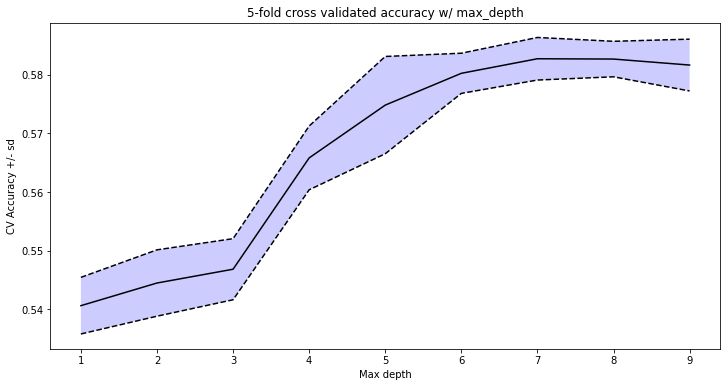

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), accuracy_list, color='black', linestyle='solid')
plt.plot(range(1, 10), np.array(accuracy_list) + np.array(accuracy_SD_list),color='black', linestyle='dashed')
plt.plot(range(1, 10), np.array(accuracy_list) - np.array(accuracy_SD_list),color='black', linestyle='dashed' )
plt.fill_between(range(1, 10), np.array(accuracy_list) + np.array(accuracy_SD_list),
                 np.array(accuracy_list) - np.array(accuracy_SD_list), alpha=0.2, facecolor ='b')
plt.plot()
plt.title('5-fold cross validated accuracy w/ max_depth')  
plt.xlabel('Max depth')  
plt.ylabel('CV Accuracy +/- sd') 
plt.show()

#Conclusion
With everything we have learned from our graphs, maps, correlations and machine learning methods, we can conclude that price is affected by neighbourhood groups, room types, distance to subway entrances and there is a correlation between all these features.